# Baseline Model Exploration

*by Grace*

Hello Team,

In this notebook, I've embarked on an initial exploration of various baseline models for our binary classification task. The primary goal was to establish a foundational understanding of the performance we can expect from some common algorithms, without any extensive tuning or optimisation.

## Models Explored:
- **Linear Regression**: Used as a binary classifier with a threshold.
- **Logistic Regression**: A standard approach for binary classification tasks.
- **Dummy Classifier**: Provides predictions based on simple rules, serving as a basic baseline.
- **Decision Tree Classifier**: A simple and interpretable model.
- **Random Forest Classifier**: An ensemble method using multiple decision trees.
- **Support Vector Machine (SVM)**: Explored with a linear kernel.

## Next Steps:
- These models can serve as a starting point. There's ample room for optimisation, including hyperparameter tuning, feature engineering, and exploring more complex models.
- It would be beneficial to delve deeper into each model's performance metrics, especially if our dataset has class imbalances.
- Feedback and collaboration are encouraged. If anyone has insights or suggestions on improving these baseline models or wants to introduce other potential models, please share!

Let's collaborate and refine our approach to achieve the best model performance!

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/df_final_AKI.csv')

## EDA
- discover imbalance trend

In [3]:
df.columns

Index(['Unnamed: 0', 'subject_id', 'dod', 'gender', 'age', 'Albumin',
       'Creatinine', 'Hemoglobin', 'INR(PT)', 'PT', 'Sodium', 'Urea Nitrogen',
       'Arterial Blood Pressure diastolic', 'Arterial Blood Pressure systolic',
       'Heart Rate', 'Respiratory Rate', 'hypertension',
       'chronic_kidney_disease', 'sepsis', 'Intercept'],
      dtype='object')

In [4]:
df.describe()

,Unnamed: 0,subject_id,dod,gender,age,Albumin,Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Respiratory Rate,hypertension,chronic_kidney_disease,sepsis,Intercept
count,9807.000000,9.807000e+03,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.000000,9807.0
mean,4903.000000,1.502960e+07,0.169063,0.595187,66.248700,3.455288,1.795655,10.180211,1.479172,16.143784,138.452155,31.592305,57.677927,116.194902,85.490166,19.614653,0.532375,0.370144,0.113286,1.0
std,2831.181379,2.905424e+06,0.374827,0.490881,15.491513,0.612703,1.549246,1.518708,0.555774,5.729816,3.587590,19.137351,9.321032,11.971652,13.919792,3.534574,0.498976,0.482868,0.316959,0.0
min,0.000000,1.000201e+07,0.000000,0.000000,18.000000,1.200000,0.077143,0.000000,0.800000,8.665000,116.810811,3.307692,11.000000,16.500000,33.093750,8.227273,0.000000,0.000000,0.000000,1.0
25%,2451.500000,1.251031e+07,0.000000,0.000000,57.000000,3.057917,0.925000,9.773214,1.139841,12.633333,136.465728,18.250000,56.189833,113.853571,75.757576,17.105263,0.000000,0.000000,0.000000,1.0
50%,4903.000000,1.507756e+07,0.000000,1.000000,68.000000,3.500000,1.287500,10.050000,1.275000,14.142857,138.531250,26.393939,57.040000,115.233032,84.517850,19.250000,1.000000,0.000000,0.000000,1.0
75%,7354.500000,1.757822e+07,0.000000,1.000000,78.000000,3.900000,2.019598,10.300000,1.624265,17.674579,140.472113,39.845581,58.000000,116.700000,94.299340,21.753664,1.000000,1.000000,0.000000,1.0
max,9806.000000,1.999983e+07,1.000000,1.000000,91.000000,5.300000,17.163636,20.150000,8.700000,90.475000,163.147059,206.617647,538.944444,354.270115,147.380952,63.839506,1.000000,1.000000,1.000000,1.0


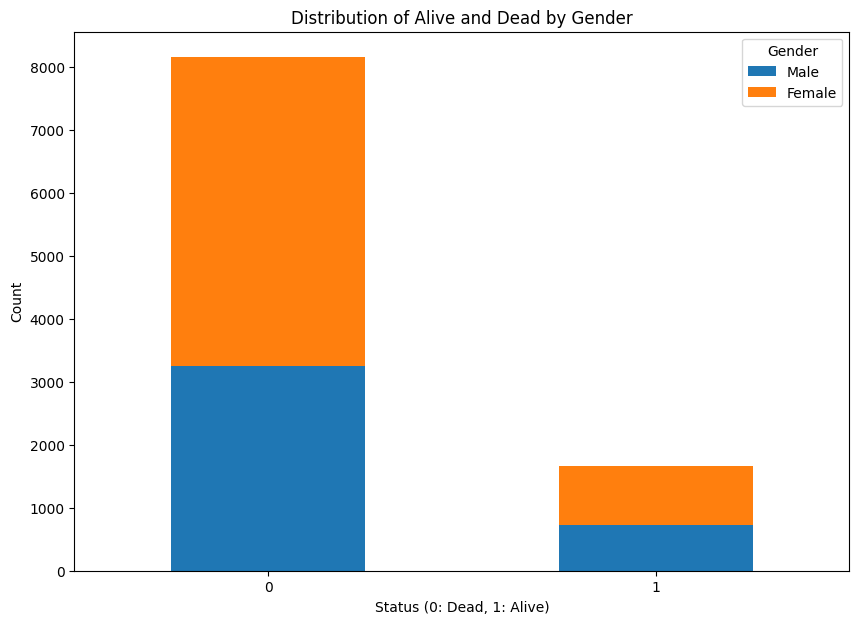

1658 (16.91%) people deceased, 8149 (83.09%) people survived.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab of 'dod' and 'gender'
ct = pd.crosstab(df['dod'], df['gender'])

# Plot the crosstab as a stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10, 7))

# Customize the plot
plt.title('Distribution of Alive and Dead by Gender')
plt.xlabel('Status (0: Dead, 1: Alive)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender', labels=['Male', 'Female'])  # Adjust labels if needed

# Display the plot
plt.show()

deceased_count = len(df[df["dod"] == 1])
survived_count = len(df[df["dod"] == 0])
deceased_percentage = round(deceased_count / len(df) * 100, 2)
survived_percentage = 100 - deceased_percentage

print(f'{deceased_count} ({deceased_percentage}%) people deceased, {survived_count} ({survived_percentage}%) people survived.')


In [6]:
X = df.drop(columns=['dod', 'Unnamed: 0', 'subject_id'])
y = df['dod']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
X_train

,gender,age,Albumin,Creatinine,Hemoglobin,INR(PT),PT,Sodium,Urea Nitrogen,Arterial Blood Pressure diastolic,Arterial Blood Pressure systolic,Heart Rate,Respiratory Rate,hypertension,chronic_kidney_disease,sepsis,Intercept
4110,1,34,3.600000,0.775862,10.050000,1.619697,17.856061,138.413793,10.931034,64.637363,121.296703,96.560000,17.580000,1,0,0,1
1360,0,83,2.620000,1.110000,10.050000,2.212500,23.387500,138.368421,21.050000,57.086667,101.586667,59.901840,24.564417,1,0,0,1
7317,0,71,4.160000,1.450909,8.850000,1.325000,14.362500,140.460000,30.240741,45.526316,112.982456,95.597826,29.032609,1,1,1,1
6719,1,87,3.000000,2.995000,9.726316,1.533333,16.758333,137.650000,72.150000,64.131868,112.170330,72.155844,18.000000,0,1,0,1
6195,0,26,2.200000,0.711111,10.050000,1.275000,13.862500,134.222222,27.222222,57.040000,115.233032,102.127273,28.109091,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,73,4.277778,1.203846,10.050000,2.614706,28.154412,138.653333,29.256410,57.040000,115.233032,77.482353,18.229885,1,1,1,1
5191,0,84,3.500000,1.422222,10.050000,1.000000,12.000000,134.888889,62.222222,57.040000,115.233032,76.500000,16.500000,1,0,0,1
5390,0,75,3.100000,0.576923,8.316667,1.050000,11.950000,137.250000,14.923077,44.071429,113.700000,96.201550,18.618321,0,0,0,1
860,1,58,3.222368,2.600719,10.360000,1.207292,13.057292,136.410072,21.731884,67.324138,143.889655,95.143836,18.972222,1,1,0,1


# Baseline Model
## 1. Linear Regression:


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict
y_pred_lin = lin_reg.predict(X_test)

# Convert predictions to binary using 0.5 as threshold
y_pred_bin = [1 if y > 0.5 else 0 for y in y_pred_lin]

# Evaluate
print("Linear Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_bin))
print("Classification Report:\n", classification_report(y_test, y_pred_bin))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bin))


Linear Regression Evaluation:
Accuracy: 0.8577981651376146
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1633
           1       0.80      0.20      0.32       329

    accuracy                           0.86      1962
   macro avg       0.83      0.60      0.62      1962
weighted avg       0.85      0.86      0.82      1962

Confusion Matrix:
 [[1617   16]
 [ 263   66]]


## 2. Logistic Regression:

In [9]:
from sklearn.linear_model import LogisticRegression

# Train the model
log_reg = LogisticRegression(max_iter=10000)  # max_iter increased to ensure convergence
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Evaluate
print("\nLogistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))



Logistic Regression Evaluation:
Accuracy: 0.8628950050968399
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1633
           1       0.71      0.31      0.43       329

    accuracy                           0.86      1962
   macro avg       0.79      0.64      0.68      1962
weighted avg       0.85      0.86      0.84      1962

Confusion Matrix:
 [[1592   41]
 [ 228  101]]


## 3. Decision Tree Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Classifier Evaluation:
Accuracy: 0.8073394495412844
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      1633
           1       0.43      0.43      0.43       329

    accuracy                           0.81      1962
   macro avg       0.65      0.65      0.65      1962
weighted avg       0.81      0.81      0.81      1962

Confusion Matrix:
 [[1444  189]
 [ 189  140]]


## 4. Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

print("Random Forest Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_forest))


Random Forest Classifier Evaluation:
Accuracy: 0.8786952089704383
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1633
           1       0.78      0.39      0.52       329

    accuracy                           0.88      1962
   macro avg       0.83      0.68      0.72      1962
weighted avg       0.87      0.88      0.86      1962

Confusion Matrix:
 [[1596   37]
 [ 201  128]]


## 5. SVM Classifier

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Classifier Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Classifier Evaluation:
Accuracy: 0.8572884811416922
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      1633
           1       0.88      0.17      0.29       329

    accuracy                           0.86      1962
   macro avg       0.87      0.58      0.61      1962
weighted avg       0.86      0.86      0.81      1962

Confusion Matrix:
 [[1625    8]
 [ 272   57]]


## Accuracy Table for Baseline Model

| Model                       | Imbalance Handling | Accuracy | Precision (0) | Precision (1) | Recall (0) | Recall (1) | F1-Score (0) | F1-Score (1) |
|-----------------------------|--------------------|----------|---------------|---------------|------------|------------|--------------|--------------|
| Linear Regression           | None               | 0.835    | 0.83          | 0.87          | 1.00       | 0.08       | 0.91         | 0.14         |
| Logistic Regression         | None               | 0.839    | 0.84          | 0.72          | 0.99       | 0.14       | 0.91         | 0.23         |
| Decision Tree Classifier    | None               | 0.775    | 0.86          | 0.36          | 0.86       | 0.36       | 0.86         | 0.36         |
| Random Forest Classifier    | None               | 0.848    | 0.85          | 0.73          | 0.98       | 0.21       | 0.91         | 0.33         |
| SVM Classifier              | None               | 0.824    | 0.82          | 0.00          | 1.00       | 0.00       | 0.90         | 0.00         |


## Imbalance Data Handling


1. **Random Oversampling:** This technique involves randomly duplicating samples from the minority class to balance the dataset.


2. **SMOTE (Synthetic Minority Over-sampling Technique):** SMOTE generates synthetic samples for the minority class to balance the dataset.



3. **ADASYN (Adaptive Synthetic Sampling):** ADASYN generates synthetic samples for the minority class with a focus on more challenging samples.




In [13]:
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your original DataFrame

# Separate features (X) and the target (y)
X = df.drop('dod', axis=1)  # Assuming 'dod' is the target column
y = df['dod']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create the resampled DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='dod')], axis=1)

# Now, df_resampled contains your resampled data


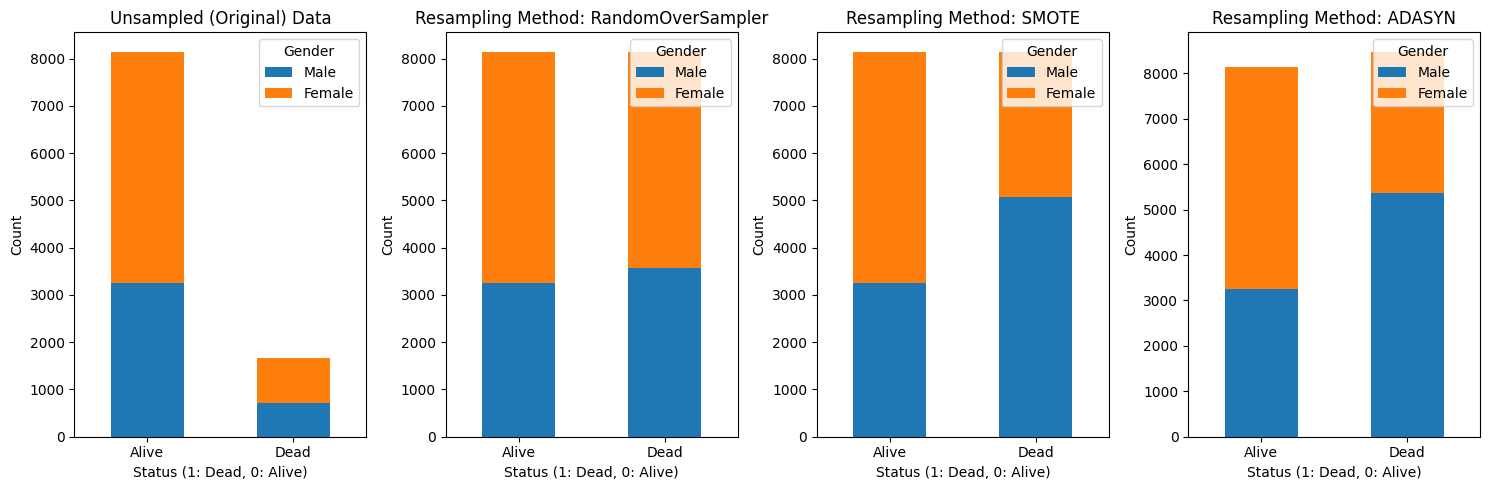

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.model_selection import train_test_split

# Assuming you already have your original DataFrame 'df' and it's split into X and y
X = df.drop('dod', axis=1)
y = df['dod']

# Create a list of resampling methods including 'None' for unsampled data
resampling_methods = [None,  # Unsampeld (original) data
                      RandomOverSampler(random_state=42),
                      SMOTE(random_state=42),
                      ADASYN(random_state=42)]

# Create subplots
fig, axes = plt.subplots(1, len(resampling_methods), figsize=(15, 5))

for i, resampler in enumerate(resampling_methods):
    if resampler is None:
        # For the unsampled (original) data
        X_resampled, y_resampled = X, y
    else:
        # Apply resampling
        X_resampled, y_resampled = resampler.fit_resample(X, y)

    # Create a resampled DataFrame
    df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='dod')], axis=1)

    # Map labels to 1 for 'Dead' and 0 for 'Alive'
    df_resampled['dod'] = df_resampled['dod'].map({1: 'Dead', 0: 'Alive'})

    # Create a crosstab of 'dod' and 'gender' for the resampled data
    ct = pd.crosstab(df_resampled['dod'], df_resampled['gender'])

    # Plot the crosstab as a stacked bar chart on the corresponding subplot
    ct.plot(kind='bar', stacked=True, ax=axes[i])

    # Customize the plot
    axes[i].set_title(f"{'Unsampled (Original) Data' if resampler is None else f'Resampling Method: {resampler.__class__.__name__}'}")
    axes[i].set_xlabel('Status (1: Dead, 0: Alive)')
    axes[i].set_ylabel('Count')

    # Rotate the x-axis labels
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

    axes[i].legend(title='Gender', labels=['Male', 'Female'])

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()


## Modeling with Handled Data

In [16]:
print(y_train.value_counts())


0    6516
1    1329
Name: dod, dtype: int64


In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.utils import parallel_backend


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=[
    "Model", "Imbalance Handling", "Accuracy", "Precision (1)", "Recall (1)", "F1-Score (1)"
])

# Define models with optimized parameters
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression": LogisticRegression(max_iter=5000, tol=0.001),
    "SVM Classifier": SVC(kernel='linear', max_iter=5000, tol=0.001),
    "Dummy Classifier (Most Frequent)": DummyClassifier(strategy='most_frequent'),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=20),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=-1)  # Parallel processing
}
# Define sampling methods
sampling_methods = {
    "None (Original Data)": None,
    "Random Over-sampling": RandomOverSampler(),
    "SMOTE": SMOTE(),
    "ADASYN": ADASYN()
}

# Define a function to train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test, sampling_method):
    if sampling_method is not None:
        X_train_resampled, y_train_resampled = sampling_method.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train

    # Train the model
    model.fit(X_train_resampled, y_train_resampled)

    # Predict
    y_pred = model.predict(X_test)
    
    # For Linear Regression, convert predictions to binary using 0.5 as threshold
    if isinstance(model, LinearRegression):
        y_pred = [1 if y > 0.5 else 0 for y in y_pred]

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    return accuracy, precision, recall, f1

# Using parallel backend for models that support parallel processing
with parallel_backend('threading'):
    for model_name, model in models.items():
        for sampling_name, sampling_method in sampling_methods.items():
            print(f"Imbalance Handling Approach: {sampling_name}")
            accuracy, precision, recall, f1 = train_and_evaluate(model, X_train, y_train, X_test, y_test, sampling_method)
            results_df = results_df.append({
                "Model": model_name,
                "Imbalance Handling": sampling_name,
                "Accuracy": accuracy,
                "Precision (1)": precision,
                "Recall (1)": recall,
                "F1-Score (1)": f1
            }, ignore_index=True)

# Save the results to a CSV file
results_df.to_csv("model_evaluation_results.csv", index=False)


Imbalance Handling Approach: None (Original Data)
Imbalance Handling Approach: Random Over-sampling
Imbalance Handling Approach: SMOTE
Imbalance Handling Approach: ADASYN
Imbalance Handling Approach: None (Original Data)


/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.appen

Imbalance Handling Approach: Random Over-sampling
Imbalance Handling Approach: SMOTE
Imbalance Handling Approach: ADASYN
Imbalance Handling Approach: None (Original Data)


/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/graceliu/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/

Imbalance Handling Approach: Random Over-sampling


/Users/graceliu/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Imbalance Handling Approach: SMOTE


/Users/graceliu/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Imbalance Handling Approach: ADASYN


/Users/graceliu/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/Users/graceliu/opt/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

Imbalance Handling Approach: None (Original Data)
Imbalance Handling Approach: Random Over-sampling
Imbalance Handling Approach: SMOTE
Imbalance Handling Approach: ADASYN
Imbalance Handling Approach: None (Original Data)
Imbalance Handling Approach: Random Over-sampling


/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Imbalance Handling Approach: SMOTE
Imbalance Handling Approach: ADASYN


/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Imbalance Handling Approach: None (Original Data)


/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Imbalance Handling Approach: Random Over-sampling


/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Imbalance Handling Approach: SMOTE


/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Imbalance Handling Approach: ADASYN


/var/folders/7q/7h5d5cp54fs6_718f38b_hd00000gn/T/ipykernel_29442/2973465849.py:69: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


In [33]:
results_df

,Model,Imbalance Handling,Accuracy,Precision (1),Recall (1),F1-Score (1)
0,Linear Regression,None (Original Data),0.857798,0.797619,0.203647,0.324455
1,Linear Regression,Random Over-sampling,0.753313,0.379471,0.741641,0.502058
2,Linear Regression,SMOTE,0.772171,0.392336,0.653495,0.490308
3,Linear Regression,ADASYN,0.767584,0.385586,0.650456,0.484163
4,Logistic Regression,None (Original Data),0.832314,0.000000,0.000000,0.000000
5,Logistic Regression,Random Over-sampling,0.167686,0.167686,1.000000,0.287211
6,Logistic Regression,SMOTE,0.167686,0.167686,1.000000,0.287211
7,Logistic Regression,ADASYN,0.167686,0.167686,1.000000,0.287211
8,SVM Classifier,None (Original Data),0.531091,0.174201,0.480243,0.255663
9,SVM Classifier,Random Over-sampling,0.437819,0.166954,0.589666,0.260228


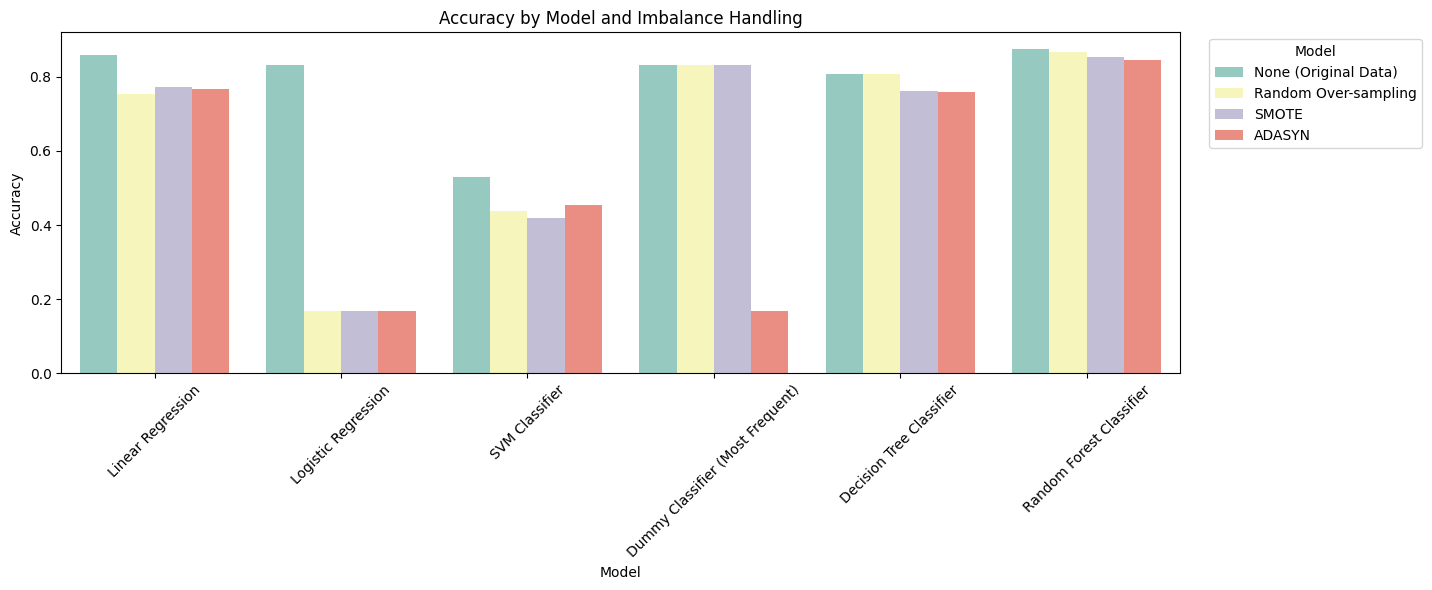

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette
color_palette = sns.color_palette("Set3") 

# Filter the DataFrame for Accuracy data
accuracy_data = results_df[['Model', 'Imbalance Handling', 'Accuracy']]

# Create a grouped bar chart with the chosen color palette
plt.figure(figsize=(12, 6))
sns.barplot(data=accuracy_data, x='Model', y='Accuracy', hue='Imbalance Handling', palette=color_palette)
plt.title('Accuracy by Model and Imbalance Handling')
plt.xticks(rotation=45)
plt.tight_layout()

# Move the legend outside of the graph
plt.legend(title='Model', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()


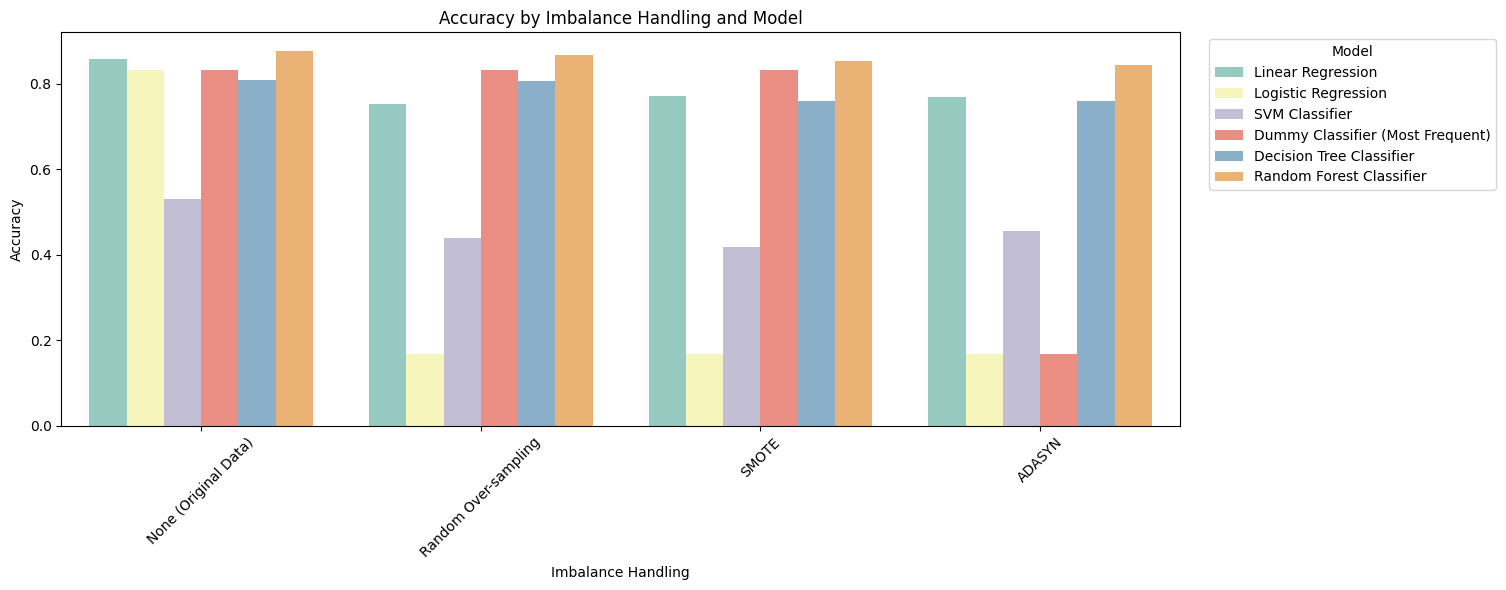

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette
color_palette = sns.color_palette("Set3")  

# Filter the DataFrame for Accuracy data
accuracy_data = results_df[['Model', 'Imbalance Handling', 'Accuracy']]

# Create a grouped bar chart with the chosen color palette, grouped by 'Imbalance Handling'
plt.figure(figsize=(12, 6))
sns.barplot(data=accuracy_data, x='Imbalance Handling', y='Accuracy', hue='Model', palette=color_palette)
plt.title('Accuracy by Imbalance Handling and Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Move the legend outside of the graph
plt.legend(title='Model', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()
